In [3]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

N = 10
beta = 1
L = 1
k,l = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))
t_vals = np.linspace(0,100,100)

def F(k,l):
    K = np.sqrt(k**2 + l**2)
    return K**2 * np.exp(-(l*k)**2)

def omega(k, l):
    return -beta * k / (k**2 + l**2 + L**-2)

In [4]:
t,x,y = np.meshgrid(np.linspace(0,100,100),np.linspace(-1,1,N),np.linspace(-1,1,N),indexing='ij')
k,l = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))

F_vals = F(k,l)
phi = np.random.uniform(-2*np.pi, 2*np.pi, size=(N,N))
omega_vals = omega(k,l)

function_vals = F_vals[np.newaxis,np.newaxis,np.newaxis,:,:] * np.exp(1j*(k*x[np.newaxis,np.newaxis,:,:,:]+l*y[np.newaxis,np.newaxis,:,:,:]))*np.exp(1j*omega_vals[np.newaxis,np.newaxis,np.newaxis,:,:]*t[np.newaxis,np.newaxis,:,:,:]+phi[np.newaxis,np.newaxis,np.newaxis,:,:])
f = np.real(np.sum(function_vals, axis=(0, 1)))

<IPython.core.display.Javascript object>


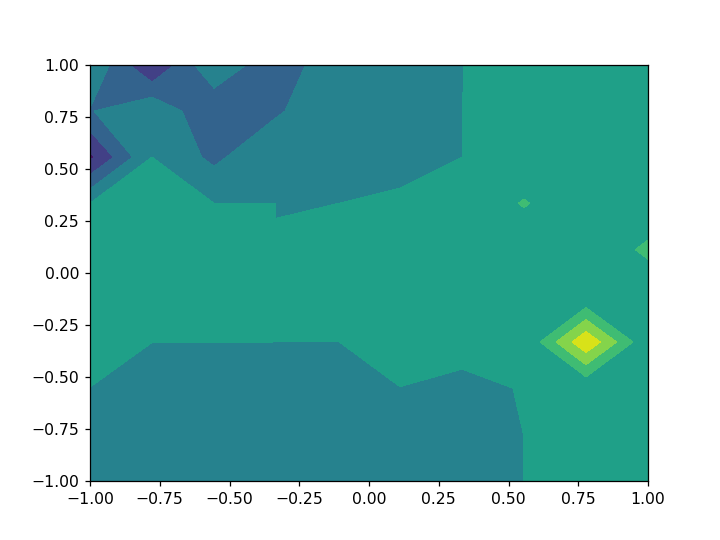

In [10]:
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.contourf(x[0,:,:],y[0,:,:],f[i])
ani = animation.FuncAnimation(fig, animate, len(t_vals), interval=50, blit=False,repeat=True)
#ani.save('sum.mp4')
plt.show()